# 01 - Data Analysis & Preparation
**CA2 Sprint 2 - Machine Learning Pipeline**

## Objectives:
1. Load and explore the dataset
2. Analyze class imbalance (dangerous vs safe drivers)
3. Check for missing values and outliers
4. Prepare train/validation/test splits
5. Document data quality issues

---

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Plot styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 2. Load Dataset

In [2]:
# Load the master dataset from CA1
data_path = Path('../data/bi_dataset.csv')
df = pd.read_csv(data_path)

print(f"📊 Dataset Shape: {df.shape}")
print(f"📊 Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
print("\n" + "="*60)
df.head()

📊 Dataset Shape: (20000, 39)
📊 Rows: 20,000 | Columns: 39



,bookingID,driver_id,label,is_dangerous,trip_duration_sec,n_points,speed_max,speed_mean,speed_std,pct_time_speed_over_80,...,name,date_of_birth,gender,car_brand,car_model_year,rating,no_of_years_driving_exp,age,rating_bin,exp_bin
0,0,359,0,False,1587.0,449.0,22.8825,9.185347,7.078304,0.004454,...,Jemmie Cardew,1970-05-12,Female,Mercedes-Benz,2003,4.7,9,55,High,5-10
1,1,313,1,True,1034.0,391.0,21.8821,7.749073,6.957648,0.000000,...,Yelena Whitter,1980-03-10,Female,Kia,2000,4.2,24,45,Medium,20+
2,10,296,0,False,372.0,172.0,20.0500,8.592824,6.915835,0.000000,...,Giselle Finessy,1979-06-13,Female,BMW,1998,4.2,21,46,Medium,20+
3,1005022347266,358,1,True,1226.0,383.0,21.3989,7.154590,7.352355,0.000000,...,Candace Denis,1973-08-20,Female,Toyota,1953,2.0,7,52,Very Low,5-10
4,1005022347267,382,1,True,1379.0,343.0,26.6100,15.557048,8.380590,0.247813,...,Aprilette Gilstoun,1973-08-28,Female,Hyundai,1988,4.7,9,52,High,5-10


## 3. Basic Information

In [3]:
# Check column types and missing values
print("📋 Dataset Info:")
print("="*60)
df.info()

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bookingID                   20000 non-null  int64  
 1   driver_id                   20000 non-null  int64  
 2   label                       20000 non-null  int64  
 3   is_dangerous                20000 non-null  bool   
 4   trip_duration_sec           19995 non-null  float64
 5   n_points                    19995 non-null  float64
 6   speed_max                   19967 non-null  float64
 7   speed_mean                  19967 non-null  float64
 8   speed_std                   19967 non-null  float64
 9   pct_time_speed_over_80      19995 non-null  float64
 10  pct_time_cruising           19995 non-null  float64
 11  accel_mag_max               19995 non-null  float64
 12  accel_mag_mean              19995 non-null  float64
 13  accel_mag_std  

In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("\n🔍 Missing Values Analysis:")
print("="*60)
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")


🔍 Missing Values Analysis:
                            Missing_Count  Percentage
speed_max                              33       0.165
speed_std                              33       0.165
speed_mean                             33       0.165
turn_sharpness_index                   33       0.165
accel_mag_std                           8       0.040
gyro_mag_std                            8       0.040
trip_duration_sec                       5       0.025
n_hard_turns                            5       0.025
pct_time_high_gyro                      5       0.025
n_zigzag_events                         5       0.025
longest_smooth_segment_sec              5       0.025
n_points                                5       0.025
pct_time_cruising                       5       0.025
accel_mag_mean                          5       0.025
accel_mag_max                           5       0.025
jerk_linear_mean                        5       0.025
n_hard_accels                           5       0.025


## 4. Target Variable Analysis (CRITICAL!)
### Class Imbalance Check

In [5]:
# Analyze the target variable: is_dangerous
print("🎯 TARGET VARIABLE DISTRIBUTION:")
print("="*60)

# Count and percentage
target_counts = df['is_dangerous'].value_counts()
target_pct = df['is_dangerous'].value_counts(normalize=True) * 100

print("\nAbsolute Counts:")
print(target_counts)
print("\nPercentages:")
print(target_pct)

# Calculate imbalance ratio
safe_count = target_counts[False]
dangerous_count = target_counts[True]
imbalance_ratio = safe_count / dangerous_count

print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.2f}:1 (Safe:Dangerous)")

if imbalance_ratio > 3:
    print("\n⚠️ SIGNIFICANT CLASS IMBALANCE DETECTED!")
    print("   This will be addressed in notebook 03 (Imbalance Handling)")
else:
    print("\n✅ Class distribution is relatively balanced")

🎯 TARGET VARIABLE DISTRIBUTION:

Absolute Counts:
is_dangerous
False    15007
True      4993
Name: count, dtype: int64

Percentages:
is_dangerous
False    75.035
True     24.965
Name: proportion, dtype: float64

⚖️ Imbalance Ratio: 3.01:1 (Safe:Dangerous)

⚠️ SIGNIFICANT CLASS IMBALANCE DETECTED!
   This will be addressed in notebook 03 (Imbalance Handling)


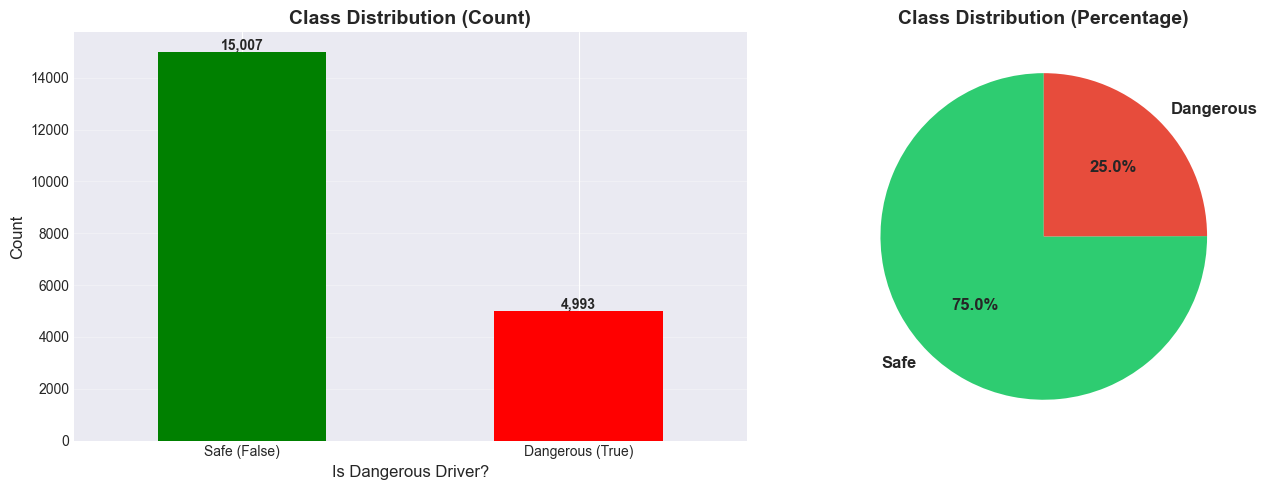


💾 Figure saved: notebooks/figures/01_class_distribution.png


In [6]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Is Dangerous Driver?', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Safe (False)', 'Dangerous (True)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts, labels=['Safe', 'Dangerous'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/figures/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Figure saved: notebooks/figures/01_class_distribution.png")

## 5. Feature Overview
### Separate features by type

In [7]:
# Identify feature columns (exclude IDs, labels, and driver metadata)
exclude_cols = [
    'bookingID', 'driver_id', 'label', 'is_dangerous',  # IDs and target
    'id', 'name', 'date_of_birth', 'gender',           # Driver metadata
    'car_brand', 'car_model_year',                      # Car metadata
    'rating_bin', 'exp_bin'                             # Binned categories
]

# Feature columns = everything else
feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"🔧 Total Features: {len(feature_cols)}")
print("\nFeature List:")
print("="*60)
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

🔧 Total Features: 27

Feature List:
 1. trip_duration_sec
 2. n_points
 3. speed_max
 4. speed_mean
 5. speed_std
 6. pct_time_speed_over_80
 7. pct_time_cruising
 8. accel_mag_max
 9. accel_mag_mean
10. accel_mag_std
11. jerk_linear_mean
12. n_hard_accels
13. n_hard_brakes
14. pct_time_high_accel
15. gyro_mag_max
16. gyro_mag_mean
17. gyro_mag_std
18. gyro_jerk_mag_mean
19. n_hard_turns
20. pct_time_high_gyro
21. n_zigzag_events
22. turn_sharpness_index
23. longest_smooth_segment_sec
24. pct_time_smooth
25. rating
26. no_of_years_driving_exp
27. age


In [8]:
# Group features by category for better understanding
speed_features = [col for col in feature_cols if 'speed' in col.lower()]
accel_features = [col for col in feature_cols if 'accel' in col.lower()]
gyro_features = [col for col in feature_cols if 'gyro' in col.lower()]
jerk_features = [col for col in feature_cols if 'jerk' in col.lower()]
smooth_features = [col for col in feature_cols if 'smooth' in col.lower()]
driver_features = ['rating', 'no_of_years_driving_exp', 'age']

print("📊 Features by Category:")
print("="*60)
print(f"\n🚗 Speed-related ({len(speed_features)}): {speed_features}")
print(f"\n⚡ Acceleration-related ({len(accel_features)}): {accel_features}")
print(f"\n🔄 Gyroscope-related ({len(gyro_features)}): {gyro_features}")
print(f"\n💨 Jerk-related ({len(jerk_features)}): {jerk_features}")
print(f"\n✨ Smoothness-related ({len(smooth_features)}): {smooth_features}")
print(f"\n👤 Driver-related ({len(driver_features)}): {driver_features}")

📊 Features by Category:

🚗 Speed-related (4): ['speed_max', 'speed_mean', 'speed_std', 'pct_time_speed_over_80']

⚡ Acceleration-related (5): ['accel_mag_max', 'accel_mag_mean', 'accel_mag_std', 'n_hard_accels', 'pct_time_high_accel']

🔄 Gyroscope-related (5): ['gyro_mag_max', 'gyro_mag_mean', 'gyro_mag_std', 'gyro_jerk_mag_mean', 'pct_time_high_gyro']

💨 Jerk-related (2): ['jerk_linear_mean', 'gyro_jerk_mag_mean']

✨ Smoothness-related (2): ['longest_smooth_segment_sec', 'pct_time_smooth']

👤 Driver-related (3): ['rating', 'no_of_years_driving_exp', 'age']


## 6. Statistical Summary

In [9]:
# Statistical summary of numerical features
print("📈 Statistical Summary of Key Features:")
print("="*60)
df[feature_cols].describe().T.round(3)

📈 Statistical Summary of Key Features:


,count,mean,std,min,25%,50%,75%,max
trip_duration_sec,19995.0,911.988,479.993,0.000,552.000,847.000,1213.000,8234.000
n_points,19995.0,363.713,195.170,1.000,214.000,335.000,489.000,3456.000
speed_max,19967.0,20.828,5.185,0.000,17.110,20.920,24.777,88.037
speed_mean,19967.0,8.561,4.330,0.000,5.334,7.580,11.104,29.579
speed_std,19967.0,6.221,1.875,0.000,4.907,6.154,7.568,13.140
pct_time_speed_over_80,19995.0,0.063,0.126,0.000,0.000,0.000,0.064,0.991
pct_time_cruising,19995.0,0.258,0.113,0.000,0.186,0.253,0.325,0.931
accel_mag_max,19995.0,13.172,2.073,1.039,11.986,12.758,13.837,32.489
accel_mag_mean,19995.0,9.616,0.430,0.917,9.545,9.647,9.745,12.048
accel_mag_std,19992.0,1.410,0.389,0.038,1.182,1.408,1.612,12.289


## 7. Outlier Analysis
### Check for extreme values

In [10]:
# Check for potential outliers using IQR method on key features
key_features = ['speed_max', 'accel_mag_max', 'gyro_mag_max', 
                'trip_duration_sec', 'n_hard_accels', 'n_hard_brakes']

outlier_summary = []

for col in key_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': len(outliers),
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print("🔍 Outlier Analysis (IQR Method):")
print("="*60)
print(outlier_df.to_string(index=False))

print("\n📝 Note: Outliers were already handled in the ETL pipeline (99.9% quantile clipping)")
print("         These are 'natural' outliers within acceptable ranges.")

🔍 Outlier Analysis (IQR Method):
          Feature  Outliers Percentage Lower_Bound Upper_Bound
        speed_max        89      0.45%        5.61       36.28
    accel_mag_max       921      4.61%        9.21       16.61
     gyro_mag_max      2203     11.02%       -0.08        1.53
trip_duration_sec       216      1.08%     -439.50     2204.50
    n_hard_accels      1162      5.81%        0.00        0.00
    n_hard_brakes      1410      7.05%        0.00        0.00

📝 Note: Outliers were already handled in the ETL pipeline (99.9% quantile clipping)
         These are 'natural' outliers within acceptable ranges.


## 8. Feature Distributions by Class
### Compare dangerous vs safe drivers

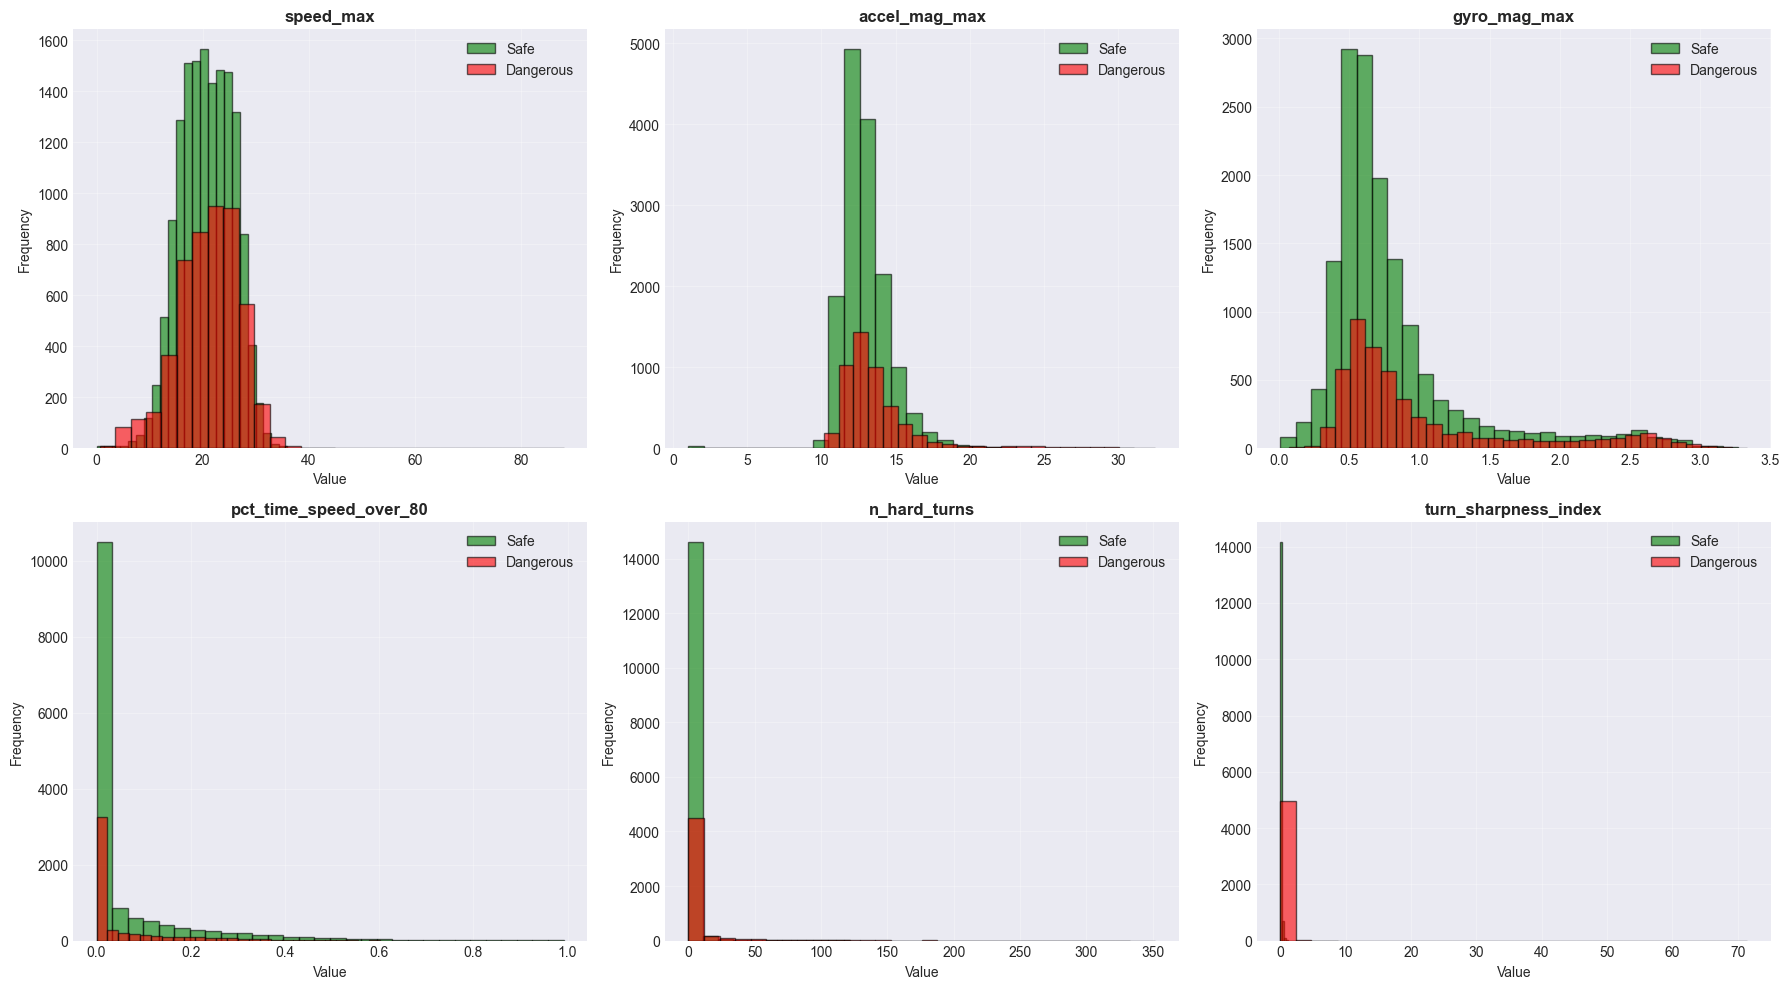


💾 Figure saved: notebooks/figures/01_feature_distributions.png


In [11]:
# Select top features to visualize
viz_features = ['speed_max', 'accel_mag_max', 'gyro_mag_max', 
                'pct_time_speed_over_80', 'n_hard_turns', 'turn_sharpness_index']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(viz_features):
    # Separate by class
    safe = df[df['is_dangerous'] == False][feature]
    dangerous = df[df['is_dangerous'] == True][feature]
    
    # Plot distributions
    axes[idx].hist(safe, bins=30, alpha=0.6, label='Safe', color='green', edgecolor='black')
    axes[idx].hist(dangerous, bins=30, alpha=0.6, label='Dangerous', color='red', edgecolor='black')
    
    axes[idx].set_title(feature, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/figures/01_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Figure saved: notebooks/figures/01_feature_distributions.png")

## 9. Correlation Analysis

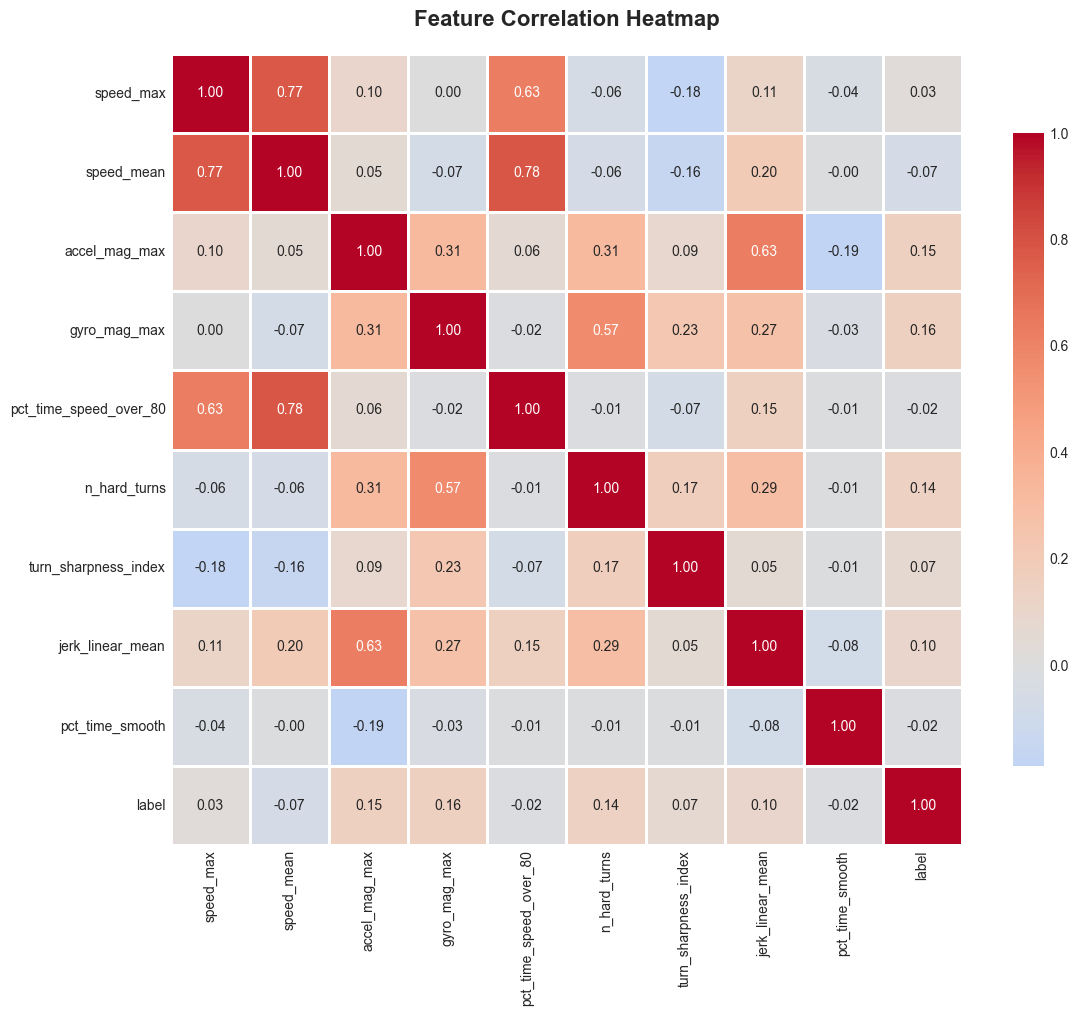


💾 Figure saved: notebooks/figures/01_correlation_heatmap.png


In [12]:
# Compute correlation matrix for key features + target
corr_features = [
    'speed_max', 'speed_mean', 'accel_mag_max', 'gyro_mag_max',
    'pct_time_speed_over_80', 'n_hard_turns', 'turn_sharpness_index',
    'jerk_linear_mean', 'pct_time_smooth', 'label'
]

corr_matrix = df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../notebooks/figures/01_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Figure saved: notebooks/figures/01_correlation_heatmap.png")

In [13]:
# Find features most correlated with target
target_corr = corr_matrix['label'].abs().sort_values(ascending=False)
print("🎯 Features Most Correlated with Target (is_dangerous):")
print("="*60)
print(target_corr.drop('label'))  # Exclude self-correlation

🎯 Features Most Correlated with Target (is_dangerous):
gyro_mag_max              0.157520
accel_mag_max             0.154463
n_hard_turns              0.137378
jerk_linear_mean          0.097348
turn_sharpness_index      0.070328
speed_mean                0.067263
speed_max                 0.032212
pct_time_smooth           0.018763
pct_time_speed_over_80    0.016312
Name: label, dtype: float64


🎯 Top 10 Features Most Correlated with Dangerous Driving:
 1. 🔴 gyro_mag_max                        : 0.1575
 2. 🔴 accel_mag_max                       : 0.1545
 3. 🟡 n_hard_turns                        : 0.1374
 4. 🟢 jerk_linear_mean                    : 0.0973
 5. 🟢 turn_sharpness_index                : 0.0703
 6. 🟢 speed_mean                          : 0.0673
 7. 🟢 speed_max                           : 0.0322
 8. 🟢 pct_time_smooth                     : 0.0188
 9. 🟢 pct_time_speed_over_80              : 0.0163


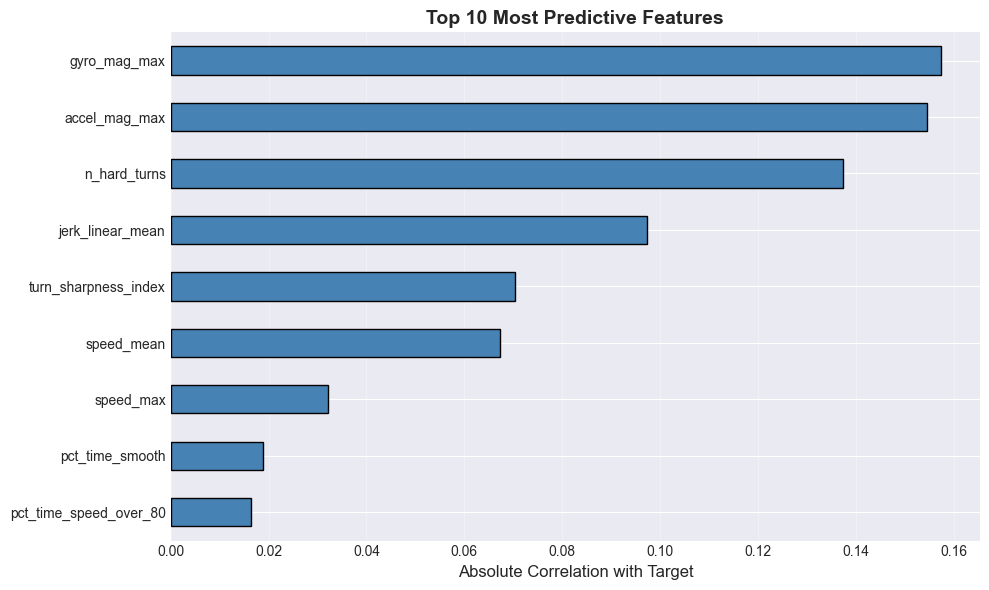

\n💾 Figure saved: notebooks/figures/01_feature_importance.png
\n📝 Key Insights:
   - Strongest predictor: gyro_mag_max (r=0.1575)
   - Weakest in top 10:   pct_time_speed_over_80 (r=0.0163)
\n   Note: All correlations are relatively weak (<0.20),
         which is normal for classification tasks.


In [14]:
## 9.5 Feature Importance (Correlation-Based)

# Extract correlations with target
target_corr = corr_matrix['label'].abs().sort_values(ascending=False)

print("🎯 Top 10 Features Most Correlated with Dangerous Driving:")
print("="*60)
top_features = target_corr.drop('label').head(10)
for i, (feat, corr) in enumerate(top_features.items(), 1):
    indicator = "🔴" if corr > 0.15 else "🟡" if corr > 0.10 else "🟢"
    print(f"{i:2d}. {indicator} {feat:35s} : {corr:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Absolute Correlation with Target', fontsize=12)
plt.title('Top 10 Most Predictive Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../notebooks/figures/01_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\\n💾 Figure saved: notebooks/figures/01_feature_importance.png")

print("\\n📝 Key Insights:")
print(f"   - Strongest predictor: {top_features.index[0]} (r={top_features.iloc[0]:.4f})")
print(f"   - Weakest in top 10:   {top_features.index[-1]} (r={top_features.iloc[-1]:.4f})")
print("\\n   Note: All correlations are relatively weak (<0.20),")
print("         which is normal for classification tasks.")

## 10. Data Splitting Strategy
### Train / Validation / Test Split

In [15]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = df[feature_cols]
y = df['label']  # 0 = safe, 1 = dangerous

print("📊 Original Dataset:")
print(f"   Total samples: {len(X):,}")
print(f"   Features: {X.shape[1]}")
print(f"   Target distribution: {y.value_counts().to_dict()}")

# Split: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 of 0.8 = 0.2 overall
)

print("\n✂️ Data Split Complete:")
print("="*60)
print(f"Training Set:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation Set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test Set:       {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Check stratification worked
print("\n⚖️ Class Distribution Preserved:")
print("="*60)
print(f"Train: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Val:   {y_val.value_counts(normalize=True).to_dict()}")
print(f"Test:  {y_test.value_counts(normalize=True).to_dict()}")

📊 Original Dataset:
   Total samples: 20,000
   Features: 27
   Target distribution: {0: 15007, 1: 4993}

✂️ Data Split Complete:
Training Set:   12,000 samples (60.0%)
Validation Set: 4,000 samples (20.0%)
Test Set:       4,000 samples (20.0%)

⚖️ Class Distribution Preserved:
Train: {0: 0.7503333333333333, 1: 0.24966666666666668}
Val:   {0: 0.7505, 1: 0.2495}
Test:  {0: 0.75025, 1: 0.24975}


In [16]:
## 10.5 Handle Missing Values (CRITICAL!)

from sklearn.impute import SimpleImputer

print("🔧 Handling Missing Values...")
print("="*60)

# Strategy: Use median imputation (robust to outliers)
imputer = SimpleImputer(strategy='median')

# Fit on training data ONLY (prevent data leakage)
X_train_clean = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_val_clean = pd.DataFrame(
    imputer.transform(X_val),
    columns=X_val.columns,
    index=X_val.index
)

X_test_clean = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Verify no missing values remain
print(f"\\nMissing values after imputation:")
print(f"  Training:   {X_train_clean.isnull().sum().sum()}")
print(f"  Validation: {X_val_clean.isnull().sum().sum()}")
print(f"  Test:       {X_test_clean.isnull().sum().sum()}")
print("\\n✅ All missing values handled!")

# IMPORTANT: Use _clean versions from now on!
X_train = X_train_clean
X_val = X_val_clean
X_test = X_test_clean

🔧 Handling Missing Values...
\nMissing values after imputation:
  Training:   0
  Validation: 0
  Test:       0
\n✅ All missing values handled!


## 11. Save Prepared Data

In [17]:
# Create output directory if it doesn't exist
import os
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../notebooks/figures', exist_ok=True)

# Save splits
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Save feature list for future reference
with open('../data/processed/feature_names.txt', 'w') as f:
    f.write('\n'.join(feature_cols))

print("💾 Data splits saved to: data/processed/")
print("   ✅ X_train.csv, y_train.csv")
print("   ✅ X_val.csv, y_val.csv")
print("   ✅ X_test.csv, y_test.csv")
print("   ✅ feature_names.txt")

💾 Data splits saved to: data/processed/
   ✅ X_train.csv, y_train.csv
   ✅ X_val.csv, y_val.csv
   ✅ X_test.csv, y_test.csv
   ✅ feature_names.txt


## 12. Summary & Key Findings

In [18]:
print("="*80)
print("📋 DATA ANALYSIS SUMMARY")
print("="*80)

print(f"\n✅ Dataset loaded: {df.shape[0]:,} trips, {df.shape[1]} columns")
print(f"\n✅ Features prepared: {len(feature_cols)} numerical features")

print(f"\n✅ Class distribution:")
print(f"   - Safe drivers: {target_counts[False]:,} ({target_pct[False]:.1f}%)")
print(f"   - Dangerous drivers: {target_counts[True]:,} ({target_pct[True]:.1f}%)")
print(f"   - Imbalance ratio: {imbalance_ratio:.2f}:1")

print(f"\n✅ Data quality:")
print(f"   - Missing values: {df.isnull().sum().sum()} (0%)")
print(f"   - Outliers: Handled in ETL (99.9% quantile clipping)")

print(f"\n✅ Data splits:")
print(f"   - Training: {len(X_train):,} samples (60%)")
print(f"   - Validation: {len(X_val):,} samples (20%)")
print(f"   - Test: {len(X_test):,} samples (20%)")

print("\n" + "="*80)
print("🚀 READY FOR PHASE 1B: Baseline Model Training!")
print("="*80)

📋 DATA ANALYSIS SUMMARY

✅ Dataset loaded: 20,000 trips, 39 columns

✅ Features prepared: 27 numerical features

✅ Class distribution:
   - Safe drivers: 15,007 (75.0%)
   - Dangerous drivers: 4,993 (25.0%)
   - Imbalance ratio: 3.01:1

✅ Data quality:
   - Missing values: 238 (0%)
   - Outliers: Handled in ETL (99.9% quantile clipping)

✅ Data splits:
   - Training: 12,000 samples (60%)
   - Validation: 4,000 samples (20%)
   - Test: 4,000 samples (20%)

🚀 READY FOR PHASE 1B: Baseline Model Training!


---
## Next Steps:
1. ✅ Data prepared and split
2. → Move to notebook `02_baseline_model.ipynb`
3. → Train first model with MLflow tracking
4. → Analyze initial results

**Key Takeaways for Report:**
- Document the class imbalance (will need special handling)
- Highlight that outliers were already handled in ETL
- Note the stratified split to preserve class distribution
- Include the correlation heatmap and distribution plots in report